# basic test for brib

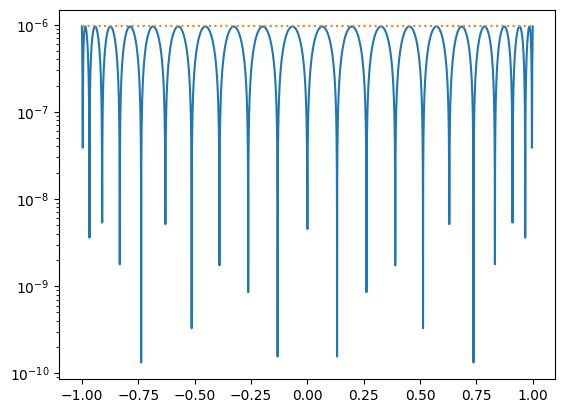

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
n=10
tol=1e-6
w = rexpi.buerrest_getw(n, tol)
r, _, _ = rexpi.brib(w,n)
xs = np.linspace(-1,1,5000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(np.abs(err))
plt.semilogy(xs,np.abs(err),[-1,1],[errmax,errmax],':');

# basci test for linearized Lawson

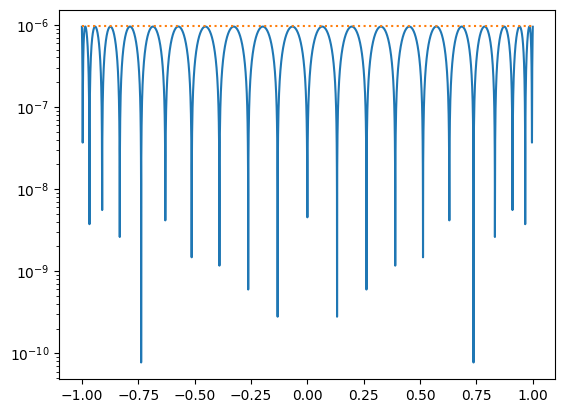

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
n=10
tol=1e-6
w = rexpi.buerrest_getw(n, tol)
r, _ = rexpi.linearizedLawson(w=w, n=n, nlawson=100,nx=1000)
xs = np.linspace(-1,1,5000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(np.abs(err))
plt.semilogy(xs,np.abs(err),[-1,1],[errmax,errmax],':');